<h1>Detección de anomalías por Prueba de Grubbs</h1>
El presente código corresponde a la detección de anomalías por medio de la Prueba de Grubbs.
Lo que busca este código es brindar una guía o tutorial para las personas que mantegan dudas respecto a cómo es la aplicación del método.
 
Este código está basado en la tesis:
<h1>AQUÍ VAN LOS DATOS DE LA TESIS, SOLO QUE FALTA VER EL NOMBRE FINAL DE ESTA</h1>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest

In [37]:
tam_muestra = 99
x = np.random.normal(size=tam_muestra)
print(len(x))

99


Se va a insertar artificialmente un dato el cual jugará el papel de una anomalía.

In [42]:
x = np.append(x, [10], axis=0)
print("El tamaño de la muestra es de",len(x2))

El tamaño de la muestra es de 100


In [43]:
bins = np.linspace(min(x), max(x), num=int(np.sqrt(tam_muestra)))

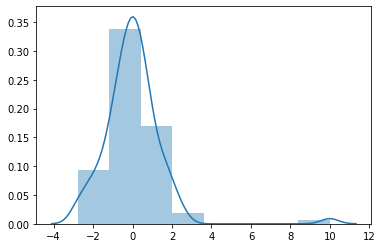

In [44]:
_ = sns.distplot(x, bins=bins)

A primera vista se puede indentificar la normalidad de la distribución, y es más notorio aún cuando la muestra es grande. De cualquier manera se debe aplicar una prueba estadística para comprobar formalmente la hipótesis. En este caso vamos a aplicar Kolmogorov–Smirnov para comprobar la distribución normal de la muestra puesto que nuestro tamaño de muestra es 100.

La significancia *a* será 0.05 o el 5 %, si nuestro p-value es mayor a *a* entonces tendremos una distribución normal.

In [45]:
prueba_KS = kstest(x, 'norm')

In [46]:
prueba_KS.pvalue

0.8183489846063573

Aquí se puede observar que el p-value que obtuvimos es aproximado a 0.82 lo cual implica que la hipótesis se cumple, ya que p-value es mayor que *a*. Por lo tanto nuestra distribución es normal.
Se procede a calcular el *z score* de las observaciones. 

In [47]:
z = np.abs(np.mean(x) - x) / np.std(x)

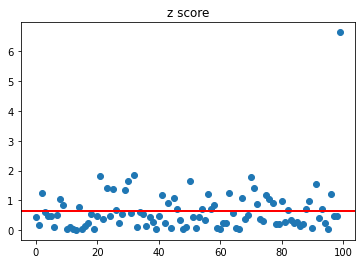

In [53]:
plt.scatter(range(len(z)), z)
plt.axhline(np.mean(z), color='red', linewidth=2)
plt.title("z score")
plt.show()

Como se puede observar, el dato que fue insertado de manera artificial se encuentra lejos de las demás observaciones, la media del z score está representada por la línea roja. Hay que recordar que se ingresó el dato de manera manual para ser una anomalía dentro de nuestra distribución.

Para definir el umbral deseado aquí es el momento perfecto para estipularlo, ya que observando la gráfica es posible determinar un divisor para distinguir anomalías de las que no lo son.

En este caso en particular, con un valor de 3.5 o 4 está bien, ya que tampoco queremos hacer un sobreajuste. Es decir, todo dato que sobrepase el valor z de 3.5 o 4 será catalogado como anomalía.

Para un ejercicio de detección de novedades, es decir, cuando se agregan datos nuevos a la variable única *x*, se calcularía el *z score* del nuevo dato y si es menor al umbral estipulado, se agrega a la variable *x* sino es rechazado. Cabe señalar que para un ejercicio de detección de novedades es sumamente barato el costo computacional para generarlo, ya que se conoce el valor de la media y de la desviación estándar con anterioridad.

Ya para terminar el proceso de detección de anomalías solo quedaría sesgar el valor anómalo y examinarlo para develar toda la información que nos puede brindar.